*The codes were developed on Windows 10, and were not tested on other machines. Anaconda 5.2.0 is chosen as a Python interpreter.*

# Outlier Detection and Correction

This notebook introduces the concept and methodology of implementing CDF plotting for statistical analysis.

<br>
<div class="alert alert-info">
<h4>Disclaimer</h4><p>The information on this page is based on the petroleum engineering class taught at the <i>University of Texas at Austin</i>, <b>Introduction to Geostatistics</b> by <b>Dr. Michael Pyrcz</b> on Fall 2018. This notebook is a work of a petrolem engineering student, <b>Eric Kim</b>.
</div>

# 0. Sample Data Set

The provided spreadsheet **PoroPermSampleData.xlsx** includes sample permeability  data that will be used through out this notebook.

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

data = pd.read_excel('PoroPermSampleData.xlsx', sheet_name='Sheet1')
permeability = np.array(data['Permeability (mD)'])
depth = np.array(data['Depth'])

data.iloc[:, [0, 2]].head()

,Depth,Permeability (mD)
0,0.25,265.528738
1,0.50,116.891220
2,0.75,136.920016
3,1.00,216.668629
4,1.25,131.594114


<IPython.core.display.Javascript object>


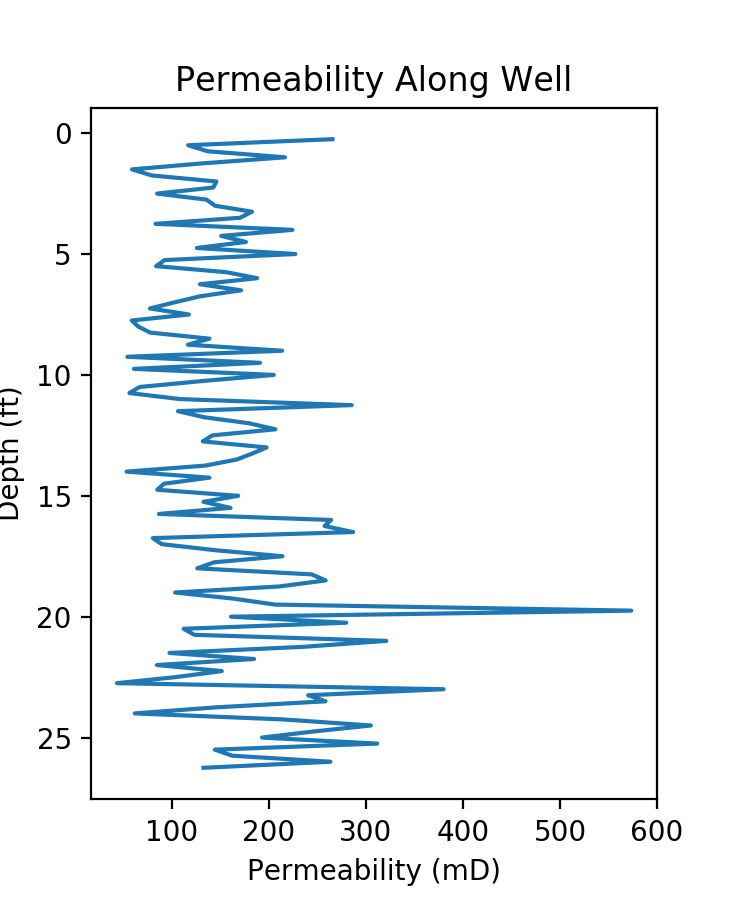

In [188]:
fig = plt.figure()
ax = plt.axes()

ax.plot(permeability, depth);
ax.invert_yaxis()
ax.set_title('Permeability Along Well')
ax.set_xlabel('Permeability (mD)')
ax.set_ylabel('Depth (ft)');

# 1. Purpose - What Do We Want To Achieve?

> **1. Detect outliers by defining upper & lower fence**

> **2. Perform actions on outliers - remove, transform, or separate**

# 2. Outlier Detection with IQR Method

*Interquartile (IQR) method* can be used to detect outliers in a given data set. There's another method called *Standard Deviation Method* that can be used to for outlier detection, but it will not be discussed here, since it requires a data set to be Guassian, or Gaussian-like distributed.

Not all data is Gaussian or Gaussian enough to apply *Standard Deviation Method*. In that case, *Interquartile (IQR) Method* can be used to detect outliers.

The following are the formulas used for IQR Method:

<p><center>IQR = P75 - P25</center></p>

<p><center>Lower Fence = P25 - 1.5 $\times$ IQR</center></p>

<p><center>Upper Fence = P75 + 1.5 $\times$ IQR</center></p>

First, the values for P75 and P25 need to be obtained. It can be done graphically, or analytically.

**Graphical Method**

The values can be graphically obtained using *Cumulative Distribution Function (CDF)*. For detailed steps of plotting, refer to **Section 3. Cumulative Distribution Function (CDF)** of  [CDF and PDF plotting for Probability Estimation].(https://github.com/aegis4048/Petroleum_Engineering/blob/master/Data%20Analysis/CDF%20and%20PDF%20plotting%20for%20Probability%20Estimation.ipynb)

<IPython.core.display.Javascript object>


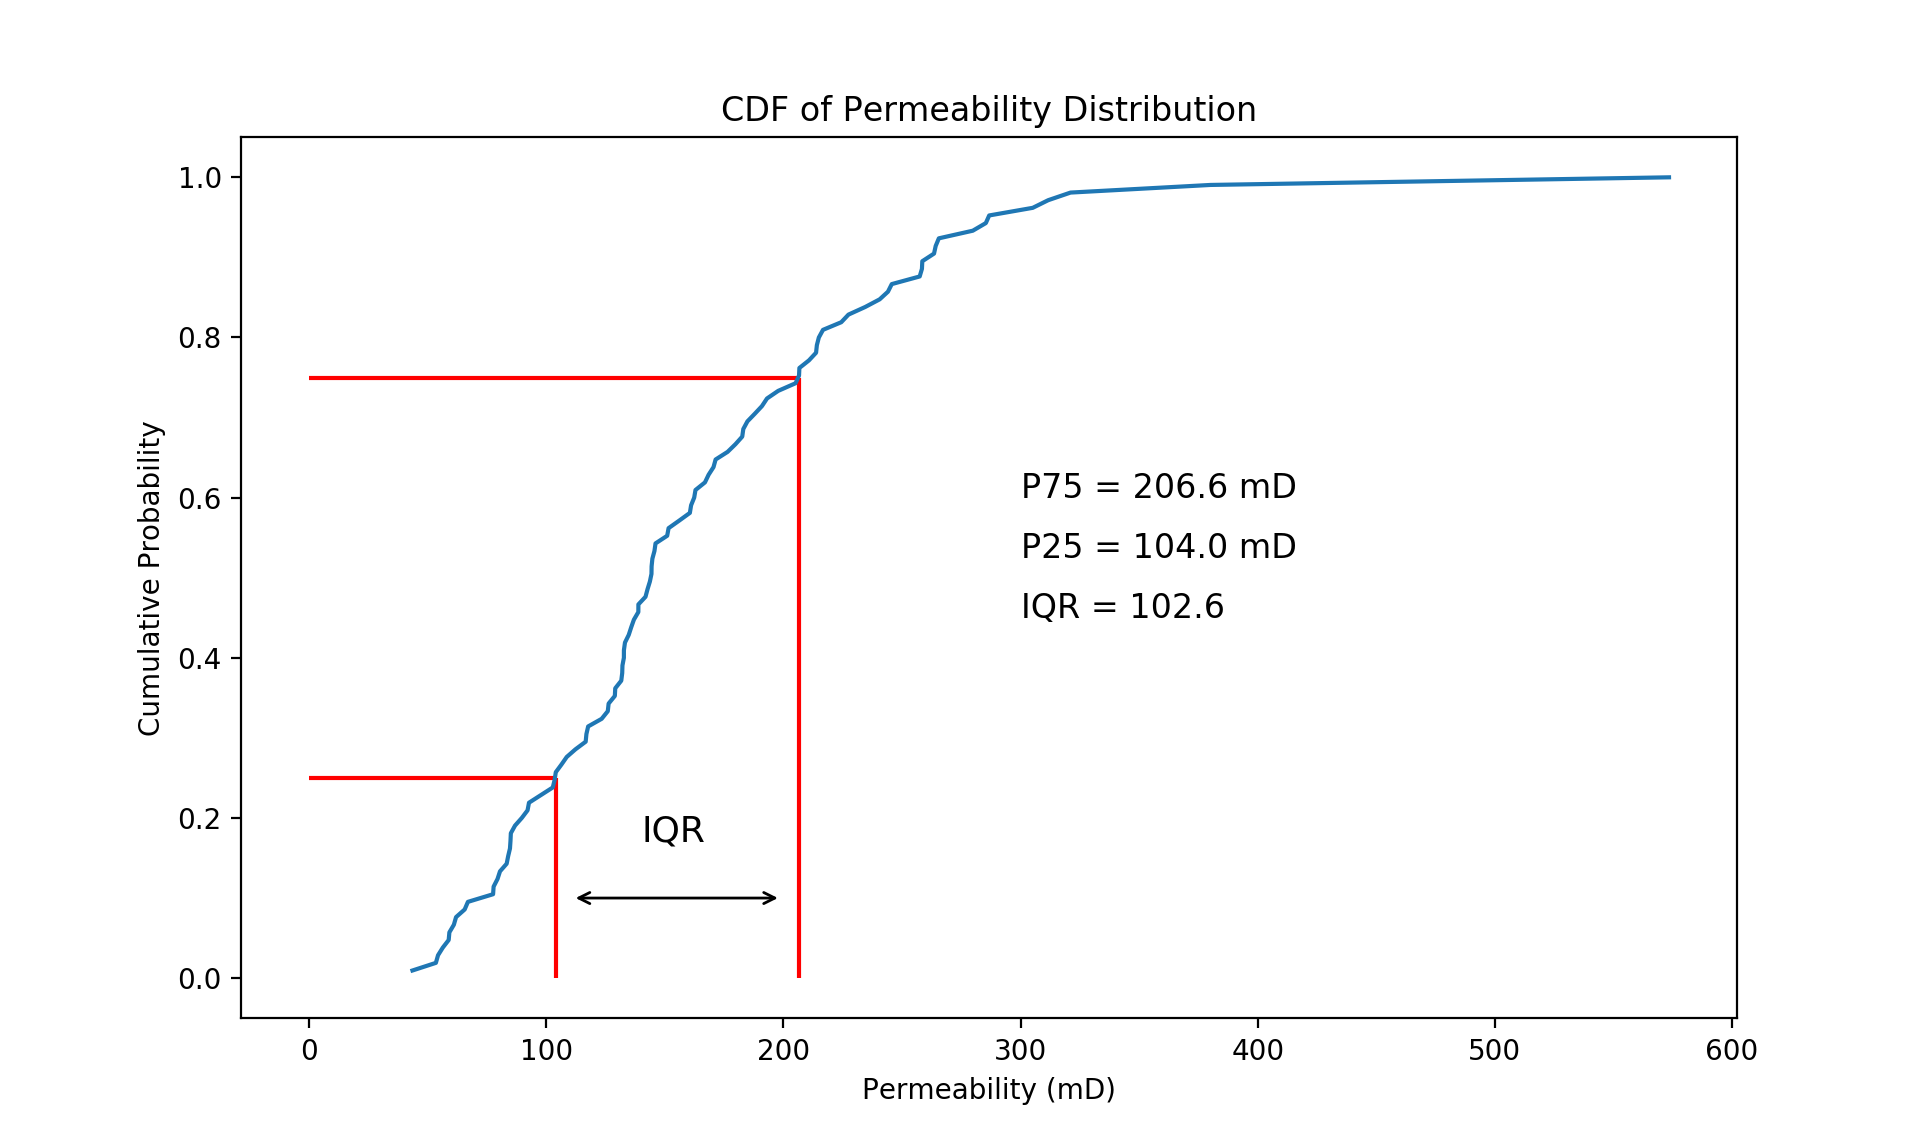

Text(200,0.1,'')

In [64]:
# always sort data first, when plotting CDF
permeability.sort()

# Create cumulative probability column
num_samples = len(permeability)
cum_probability = np.array([i / num_samples for i in range(1, num_samples + 1)])

fig = plt.figure()
ax = plt.axes()

ax.plot(permeability, cum_probability)
ax.set_title('CDF of Permeability Distribution')
ax.set_xlabel('Permeability (mD)')
ax.set_ylabel('Cumulative Probability');

h_75 = ax.hlines(y=0.75, xmin=0, xmax=206.6, color='red')
v_75 = ax.vlines(x=206.6, ymin=0, ymax=0.75, color='red')
h_25 = ax.hlines(y=0.25, xmin=0, xmax=104, color='red')
v_25 = ax.vlines(x=104, ymin=0, ymax=0.25, color='red')

t1 = ax.text(140, 0.17, 'IQR', fontsize=13)
t2 = ax.text(300, 0.6, 'P75 = 206.6 mD', fontsize=12)
t3 = ax.text(300, 0.525, 'P25 = 104.0 mD', fontsize=12)
t4 = ax.text(300, 0.45, 'IQR = 102.6', fontsize=12)

ax.annotate(s='', xy=(110,0.1), xytext=(200,0.1), arrowprops=dict(arrowstyle='<->'))

**Analytical Method**

**numpy.percentile** can be used to calculate the values of P75 and P25 quartiles. [Numpy Documentation](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.percentile.html)

In [60]:
P75 = np.percentile(permeability, 75)
P25 = np.percentile(permeability, 25)
IQR = P75 - P25

pd.DataFrame(data=np.array(np.round([P75, P25, IQR], 1)).T, index=['P75', 'P25', 'IQR'], columns=['Permeability (mD)']).T

,P75,P25,IQR
Permeability (mD),206.6,104.0,102.6


Once P75, P25, and IQR values are obtained, lower and upper fence for a given data set can be calculated.

In [66]:
lower_fence = P25 - 1.5 * IQR
upper_fence = P75 + 1.5 * IQR

pd.DataFrame(data=np.array(np.round([P75, P25, IQR, lower_fence, upper_fence], 1)).T, 
             index=['P75', 'P25', 'IQR', 'Lower Fence', 'Upper Fence'], columns=['Permeability (mD)']).T

,P75,P25,IQR,Lower Fence,Upper Fence
Permeability (mD),206.6,104.0,102.6,-49.9,360.4


Any permeability sample smaller than -49.9 mD or bigger than 360.4 mD will be considered an outlier. The outliers can be visualized in various ways. 

**Outliers in Cumulative Distribution Function (CDF) plot**

<IPython.core.display.Javascript object>


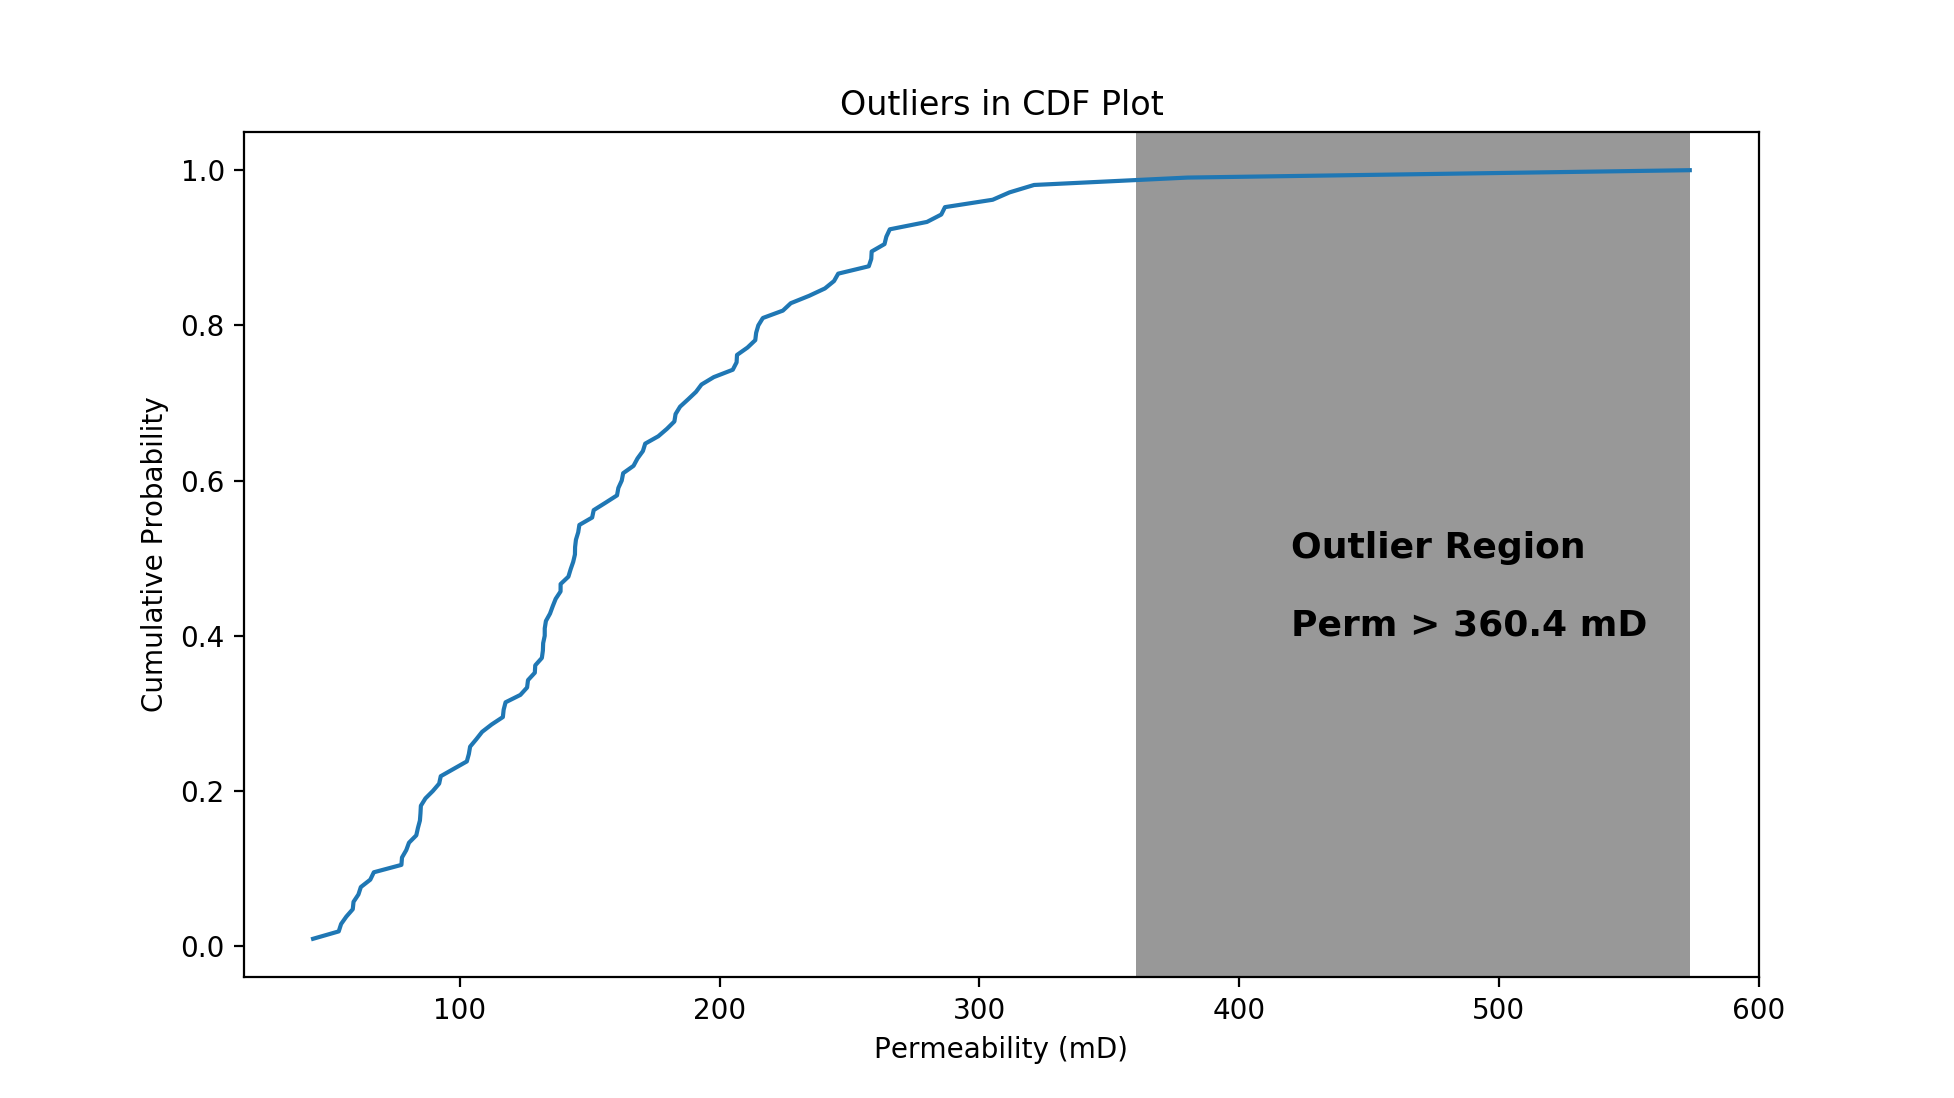

In [91]:
permeability.sort()

fig = plt.figure()
ax = plt.axes()

ax.plot(permeability, cum_probability)
ax.set_title('Outliers in CDF Plot')
ax.set_xlabel('Permeability (mD)')
ax.set_ylabel('Cumulative Probability');

ax.axvspan(upper_fence, max(permeability), facecolor='0.2', alpha=0.5)
ax.text(420, 0.5, 'Outlier Region', weight='bold', fontsize=13);
ax.text(420, 0.4, 'Perm > 360.4 mD', weight='bold', fontsize=13);

**Outliers in Probability Density Function (CDF) plot**

<IPython.core.display.Javascript object>


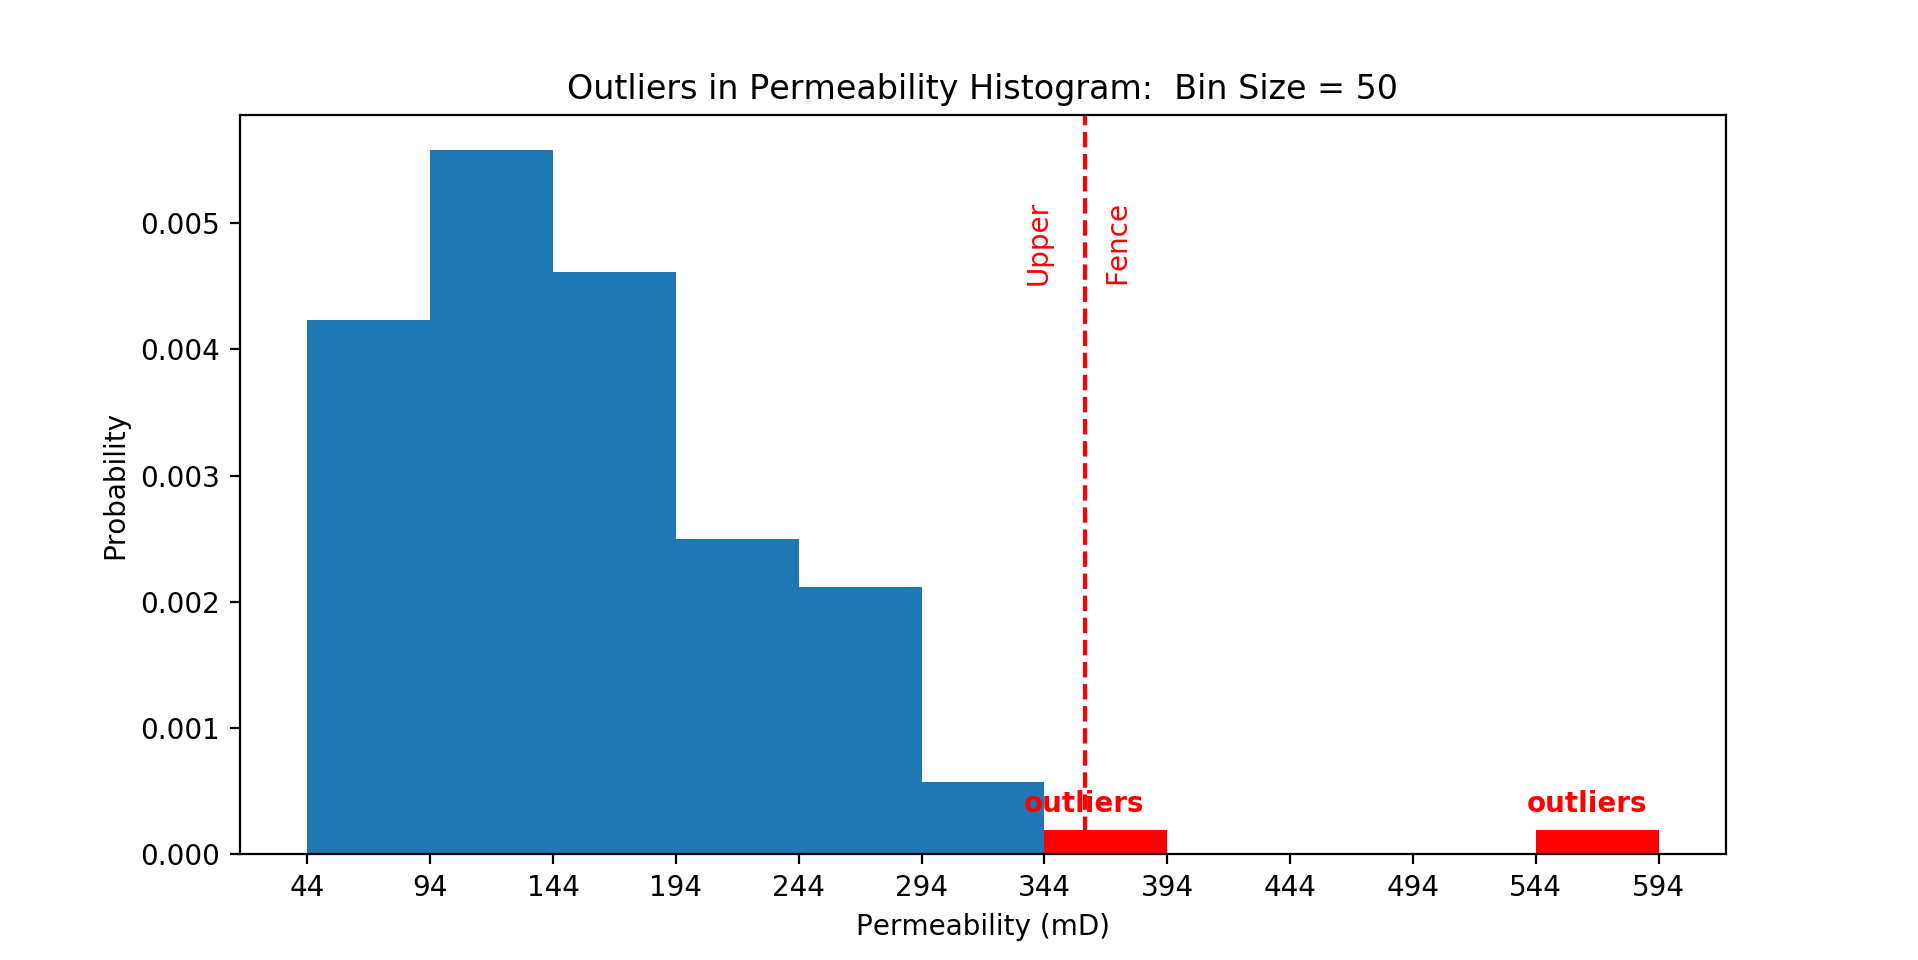

In [165]:
from matplotlib.pyplot import text

fig = plt.figure()
ax = plt.axes()

permeability = np.array(data['Permeability (mD)'])

n, bins, patches = ax.hist(permeability, bins=np.arange(min(permeability) + 0.5, max(permeability) + 50.5, 50), density=True)
ax.set_xticks(bins)
ax.set_title('Outliers in Permeability Histogram:  Bin Size = 50')
ax.set_xlabel('Permeability (mD)')
ax.set_ylabel('Probability')

ax.axvline(x=upper_fence, color='r', linestyle='--')
text(336, 0.005, "Upper", rotation=90, color='red')
text(368, 0.005, "Fence", rotation=90, color='red')

patches[6].set_facecolor('r')
patches[-1].set_facecolor('r')

ax.annotate('outliers', (565, 0.0004), xytext=(0, 0), color='red', weight='bold', textcoords="offset points", va='center', ha='center')
ax.annotate('outliers', (360, 0.0004), xytext=(0, 0), color='red', weight='bold', textcoords="offset points", va='center', ha='center');

<IPython.core.display.Javascript object>


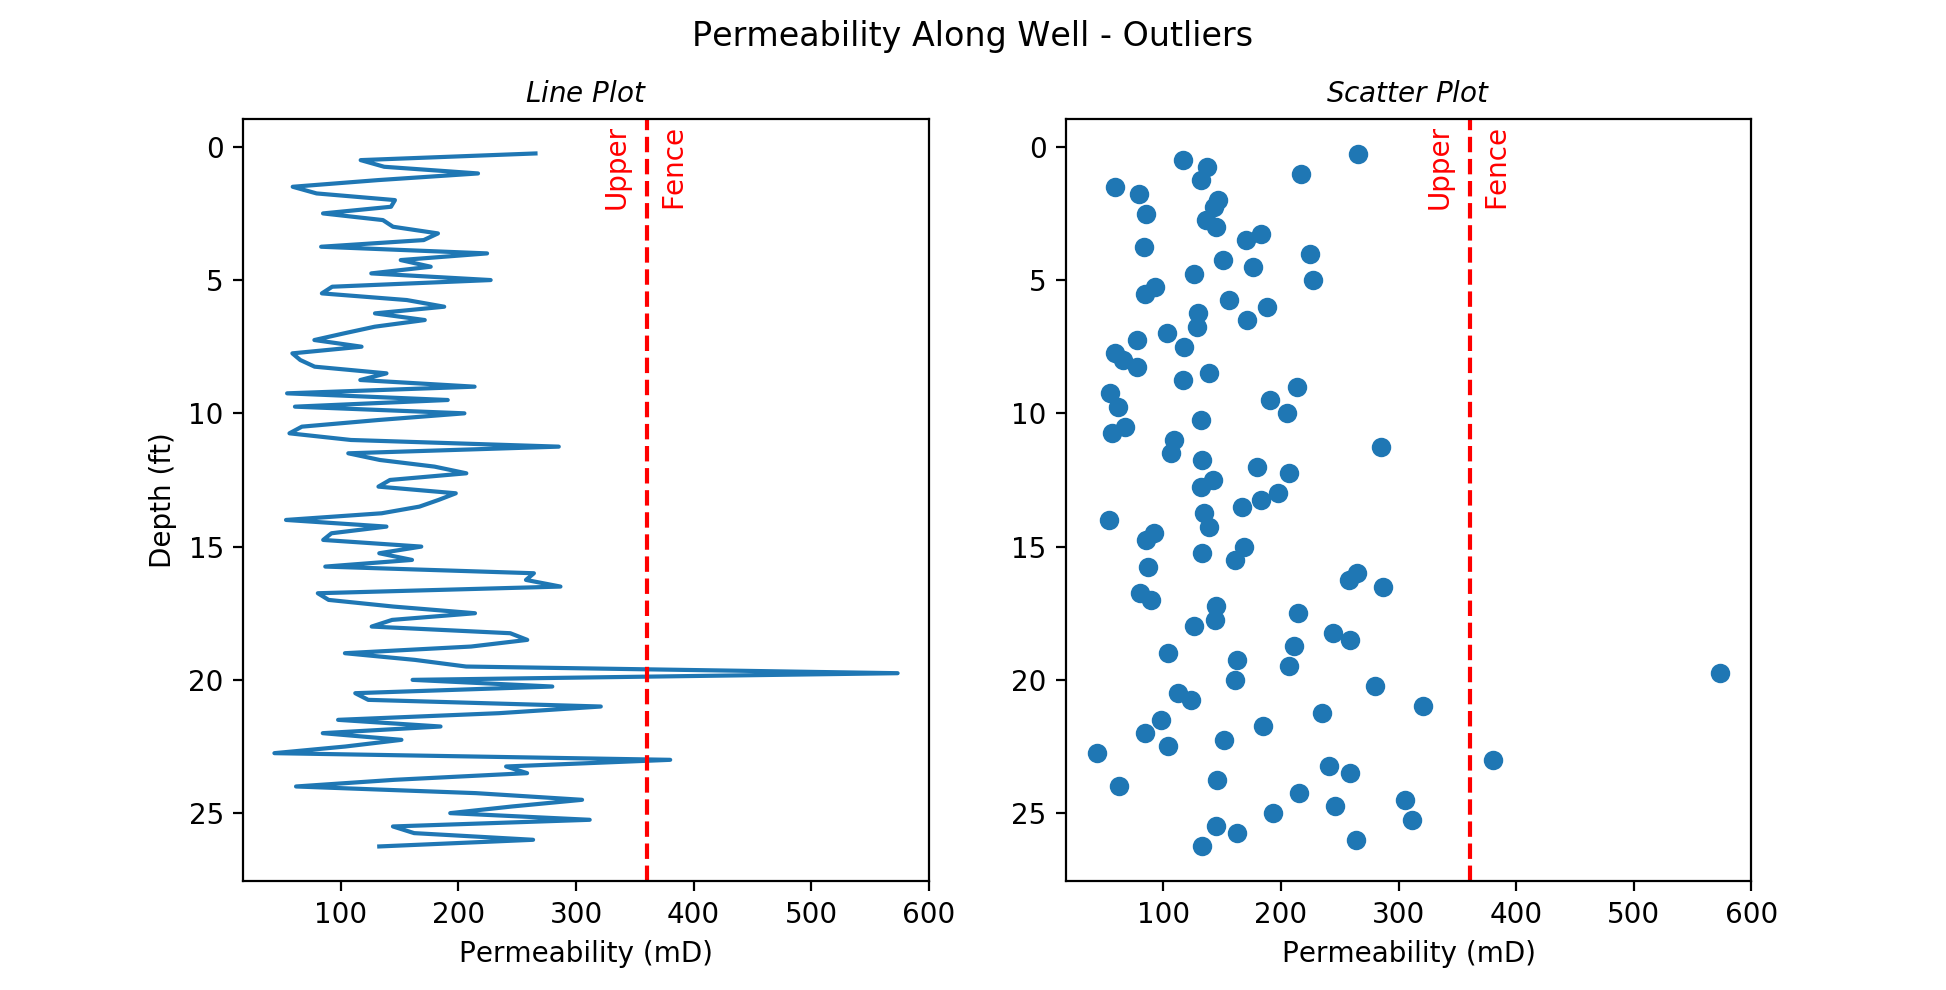

In [213]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Permeability Along Well - Outliers')

ax1.plot(permeability, depth)
ax1.invert_yaxis()
ax1.set_title('$Line \ Plot$', fontsize=10)
ax1.set_xlabel('Permeability (mD)')
ax1.set_ylabel('Depth (ft)');
ax1.axvline(x=upper_fence, color='r', linestyle='--')
ax1.text(323, 0.005, "Upper", rotation=90, color='red')
ax1.text(371, 0.005, "Fence", rotation=90, color='red')


ax2.scatter(permeability, depth)
ax2.invert_yaxis()
ax2.set_title('$Scatter \ Plot$', fontsize=10)
ax2.set_xlabel('Permeability (mD)')
ax2.axvline(x=upper_fence, color='r', linestyle='--')
ax2.text(323, 0.005, "Upper", rotation=90, color='red')
ax2.text(371, 0.005, "Fence", rotation=90, color='red');

Outliers can also be identified analytically with a simple one line python code

In [189]:
outliers = [x for x in permeability if x > upper_fence or x < lower_fence]
print('Number of outliers =', len(outliers))
outliers

Number of outliers = 2


[573.4618834647697, 380.08881721091836]

# 3. What To Do Once Outliers are detected?

There are three things that can be done:

> 1. **Remove -** must be able to demonstrate that the data is erroneous 

> 2. **Transform -** reshape the distribution for analysis

> 3. **Separate -** pull out hte outliers and work with them separately. Assumes that they are a different population

### 3.1 Remove

This can be done easily in Python. Notice how the conditional statement in the code is the exact opposite of what was used for detecting outliers.

In [219]:
# initialize
permeability = np.array(data['Permeability (mD)'])
depth = np.array(data['Depth'])

# Outlier removal
new_data = [(d, p) for d, p in zip(depth, permeability) if p > lower_fence and p < upper_fence]

# create new x- and y-axis values
new_depth = [sample[0] for sample in new_data]
new_perm = [sample[1] for sample in new_data]

New plots can be drawn using the new data set that excludes outliers.

<IPython.core.display.Javascript object>


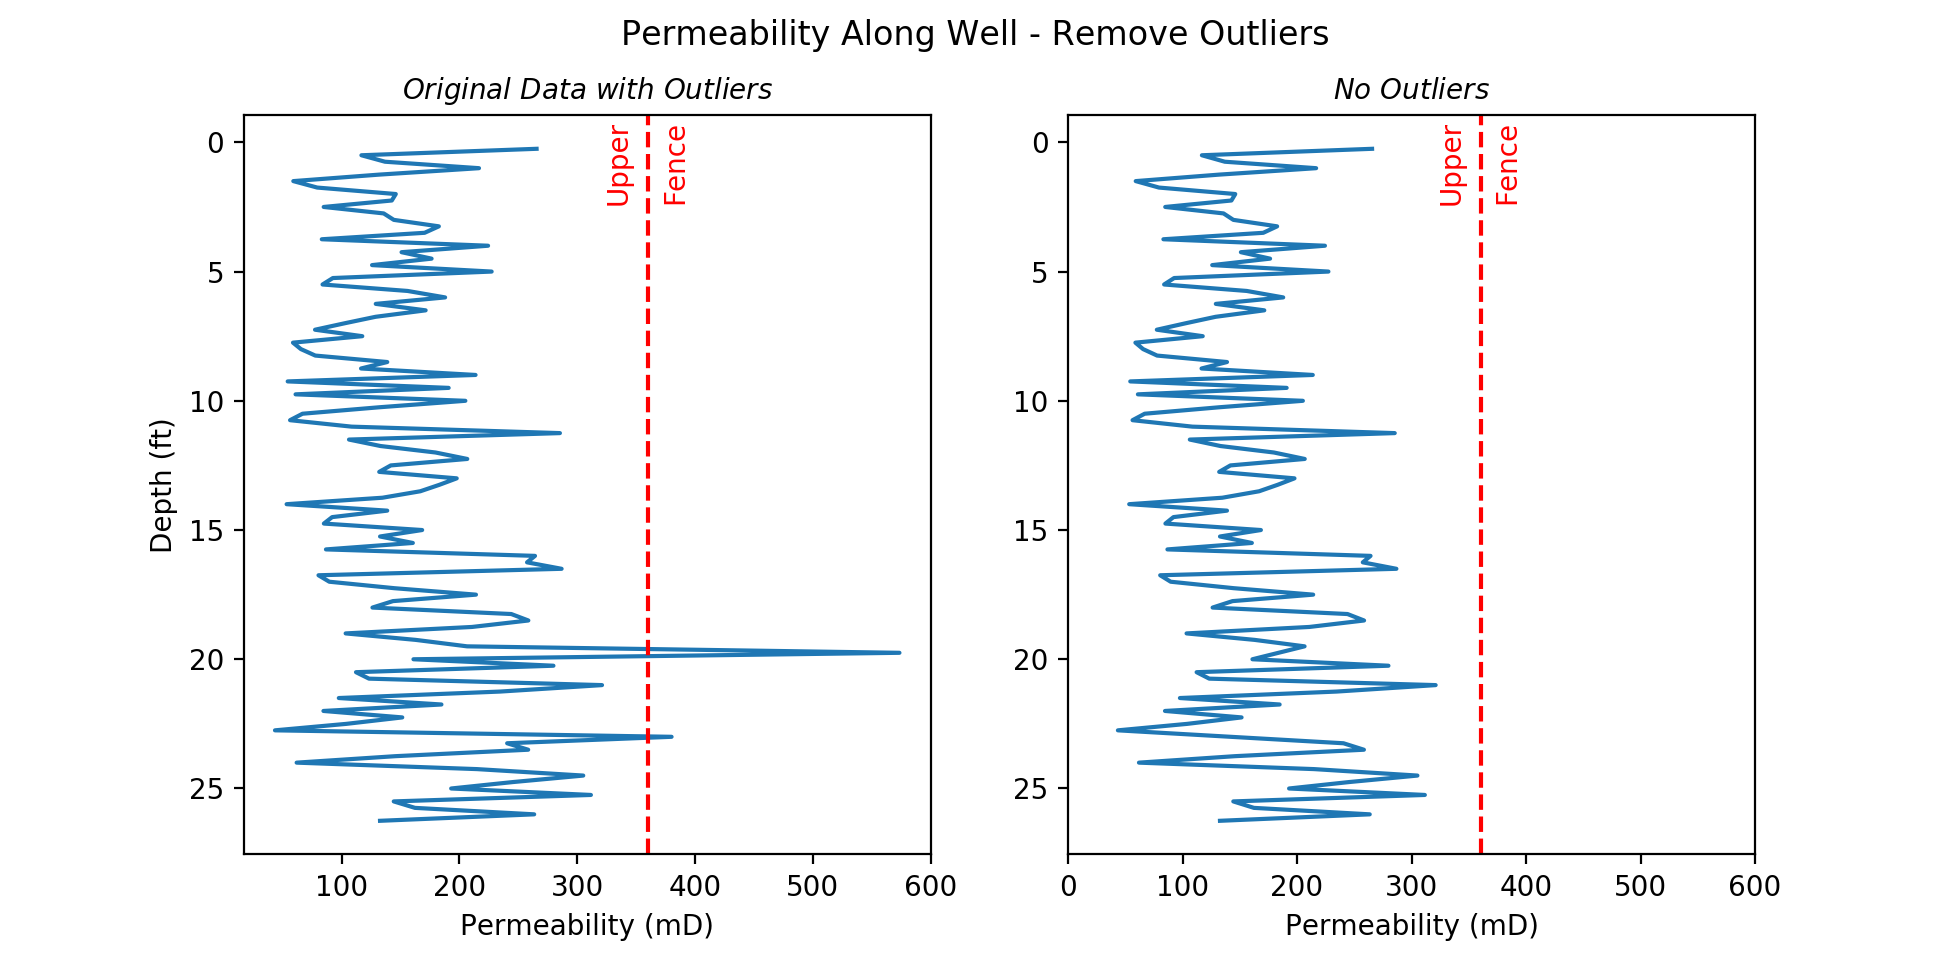

(0, 600)

In [218]:
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2)
fig.suptitle('Permeability Along Well - Remove Outliers')

ax1.plot(permeability, depth)
ax1.invert_yaxis()
ax1.set_title('$Original \ Data \ with \ Outliers$', fontsize=10)
ax1.set_xlabel('Permeability (mD)')
ax1.set_ylabel('Depth (ft)');
ax1.axvline(x=upper_fence, color='r', linestyle='--')
ax1.text(323, 0.005, "Upper", rotation=90, color='red')
ax1.text(371, 0.005, "Fence", rotation=90, color='red')


ax2.plot(new_perm, new_depth)
ax2.invert_yaxis()
ax2.set_title('$No \ Outliers$', fontsize=10)
ax2.set_xlabel('Permeability (mD)')
ax2.axvline(x=upper_fence, color='r', linestyle='--')
ax2.text(323, 0.005, "Upper", rotation=90, color='red')
ax2.text(371, 0.005, "Fence", rotation=90, color='red');
ax2.set_xlim(0, 600)

### 3.2 Transform


### 3.3 Work Seperately

If one believes that the outliers are not erroneous, but rather it is because they are from a different population, the outliers needs to be treated separately. 